In [ ]:
 import tensorflow as tf
 fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
 (X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
 X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
 X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Ankle boot'

In [10]:
 model = tf.keras.Sequential([
 tf.keras.layers.Flatten(input_shape=[28, 28]),
 tf.keras.layers.Dense(300, activation="relu"),
 tf.keras.layers.Dense(100, activation="relu"),
 tf.keras.layers.Dense(10, activation="softmax")
 ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [13]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [14]:
model.get_layer('dense') is hidden1

True

In [15]:
weights, biases = hidden1.get_weights()

In [16]:
weights

array([[-0.00464246, -0.01113927, -0.06450211, ..., -0.06006213,
         0.00917425,  0.07031956],
       [ 0.06188484,  0.06916818, -0.02919901, ..., -0.02585581,
         0.00221595, -0.0377241 ],
       [-0.02788908, -0.05915489,  0.04418952, ..., -0.03302728,
         0.03295895, -0.03245307],
       ...,
       [ 0.01364795,  0.00741249,  0.04656091, ..., -0.05809803,
        -0.05358382, -0.04941658],
       [ 0.04092845, -0.05696996,  0.00205237, ...,  0.06227708,
        -0.06466131, -0.04601428],
       [-0.01820642, -0.07133298, -0.0464109 , ...,  0.03649329,
         0.01803456,  0.06182508]], dtype=float32)

In [17]:
weights.shape

(784, 300)

In [18]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [19]:
biases.shape

(300,)

In [20]:
model.compile(loss="sparse_categorical_crossentropy",
 optimizer="sgd",
 metrics=["accuracy"])

In [21]:
history = model.fit(X_train, y_train, epochs=30,
validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.6901 - loss: 0.9758 - val_accuracy: 0.8156 - val_loss: 0.5206
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8267 - loss: 0.5014 - val_accuracy: 0.8374 - val_loss: 0.4582
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8448 - loss: 0.4436 - val_accuracy: 0.8470 - val_loss: 0.4290
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8542 - loss: 0.4164 - val_accuracy: 0.8486 - val_loss: 0.4081
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8589 - loss: 0.3968 - val_accuracy: 0.8616 - val_loss: 0.3892
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8671 - loss: 0.3795 - val_accuracy: 0.8622 - val_loss: 0.3766
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8717 - loss: 0.3645 - val_accuracy: 0.8668 - val_loss: 0.3680
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8746 - loss: 0.35

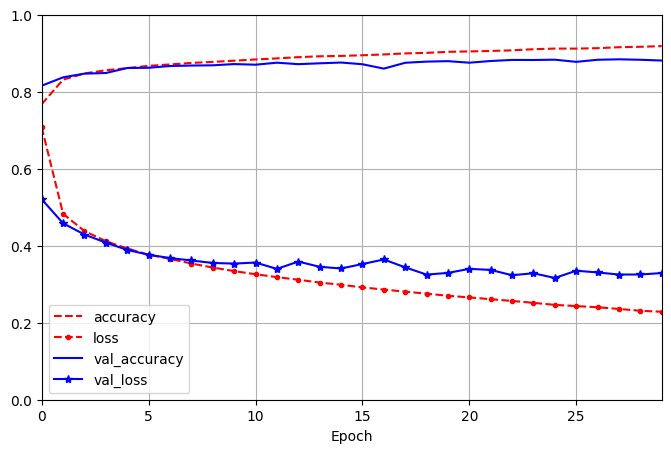

In [22]:
 import matplotlib.pyplot as plt
 import pandas as pd
 pd.DataFrame(history.history).plot(
 figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
 style=["r--", "r--.", "b-", "b-*"])
 plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8775 - loss: 0.3429


[0.34615230560302734, 0.8758000135421753]

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.01, 0.  , 0.98],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [25]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')